### ❗❗❗ ЛАБОРАТОРНАЯ 1 ❗❗❗ ###

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random

import math

from scipy.optimize import fsolve

In [29]:
eps = 1e-10
delta = 1e-10
alpha_arr = [random.uniform(0.1, 10) for _ in range(100) if random.uniform(0.1, 10) > 0]
alpha_arr = sorted(alpha_arr)

def equation(x, alpha, n):
    return alpha/(1 + x**n) - x

def equation_derivative(x, alpha, n):
    return x**(n+1) + x - alpha

def equation2_derivative(x, n):
    return (n+1) * x**(n) + 1

alpha_arr

[0.42371026253307187,
 0.49487331790277445,
 0.5675631014222907,
 0.5851161661284565,
 0.6112989729884231,
 0.6739325066705539,
 0.6899124171612944,
 0.7212290615055473,
 0.8545297870913932,
 0.8586781952697021,
 0.9377400110919788,
 0.9562119260184988,
 1.2869263274356846,
 1.3556616564148967,
 1.378281143854056,
 1.432447032122115,
 1.6006384018961208,
 1.740647878581191,
 2.044547632793585,
 2.075248406457898,
 2.0811792151793145,
 2.082887807282149,
 2.204964466104271,
 2.493001718769261,
 2.508531843785156,
 2.8259600274382546,
 2.8488399885320934,
 2.8946809640523785,
 2.97438093540439,
 3.0516012764042557,
 3.122809416157373,
 3.2477793040149585,
 3.26095779163629,
 3.367459823767954,
 3.4197618112953867,
 3.57297064413941,
 3.663385242268897,
 3.8798698133005782,
 4.046192749675352,
 4.250032555985456,
 4.2723292349061515,
 4.342111352433377,
 4.3959783490587565,
 4.4736709826943954,
 4.671971009535005,
 4.778641873050667,
 4.785425723603539,
 4.992575918523681,
 5.125655482909

In [30]:
def dichotomy(alpha, n):
    x = 0
    while equation_derivative(x, alpha, n) <= 0:
        x += 0.1
    x += 5
    a = 0
    b = x
    c = 0
    iterations = []  # Массив для хранения номеров итераций
    err_array = []  # Массив для хранения значений abs(b-a)
    i = 1  # Начальное значение номера итерации
    while(abs(b-a) > eps and abs(equation_derivative(x, alpha, n)) > delta):
        c = (a + b)/2
        iterations.append(i)
        err_array.append(abs(b - a))
        if(equation_derivative(c, alpha, n) > 0):
            b = c
        else:
            if(equation_derivative(c, alpha, n) < 0):
                a = c
        i += 1
    return c, err_array, iterations
    
def newton(alpha, n):
    cur_eps = 10e6
    cur_delta = 10e6
    x = 0.5
    x_array = []
    iterations = []  # Массив для хранения номеров итераций
    err_array = []  # Массив для хранения значений abs(b-a)
    x_array.append(x)
    i = 0  # Начальное значение номера итерации
    #while(abs(x1 - x0) > eps and abs(equation_derivative(x0, alpha, n)) > delta):
    while(cur_eps > eps and cur_delta > delta):
        x = x - equation_derivative(x, alpha, n) / equation2_derivative(x, n)
        x_array.append(x)
        cur_eps = abs(x_array[i] - x)
        cur_delta = abs(equation_derivative(x, alpha, n))
        err_array.append(cur_eps)
        i += 1
        iterations.append(i)
    return x, err_array, iterations

newton(1.0072417666925015, 2)

(0.6853415751251736,
 [0.21842386668142943,
  0.032170893829114755,
  0.0009106892885820672,
  7.084385590383491e-07],
 [1, 2, 3, 4])

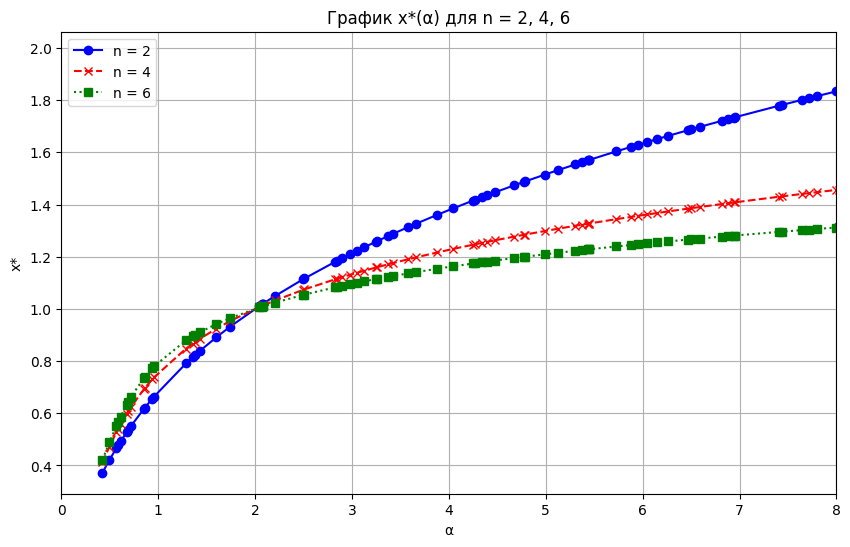

In [31]:
def find_singularPoints(n):
    ys = []  # Создаем пустой список для хранения значений ys
    for alpha in alpha_arr:
        ys_temp, err_array, iterations = dichotomy(alpha, n)
        ys.append(ys_temp)  # Вычисляем ys для каждого alpha
    return ys

# Создаем пустые списки для ys при разных значениях n
ys_2 = find_singularPoints(2)
ys_4 = find_singularPoints(4)
ys_6 = find_singularPoints(6)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(alpha_arr, ys_2, marker='o', linestyle='-', color='b', label='n = 2')
plt.plot(alpha_arr, ys_4, marker='x', linestyle='--', color='r', label='n = 4')
plt.plot(alpha_arr, ys_6, marker='s', linestyle=':', color='g', label='n = 6')
plt.xlabel('α')
plt.ylabel('x*')
plt.title('График x*(α) для n = 2, 4, 6')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)

plt.show()

In [32]:
alpha = 1.5
n = 3

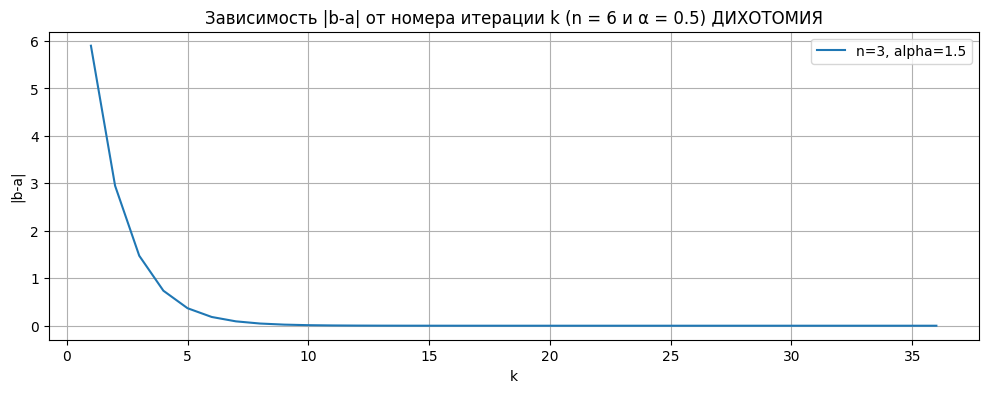

In [33]:
# Создаем пустой список для хранения результатов
results = []

dichotomy_result, err_array, iterations  = dichotomy(alpha, n)

plt.figure(figsize=(12, 4))
plt.plot(iterations, err_array, label=f'n={n}, alpha={alpha}')
plt.xlabel('k')
plt.ylabel('|b-a|')
plt.title('Зависимость |b-a| от номера итерации k (n = 6 и α = 0.5) ДИХОТОМИЯ')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
iterations

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

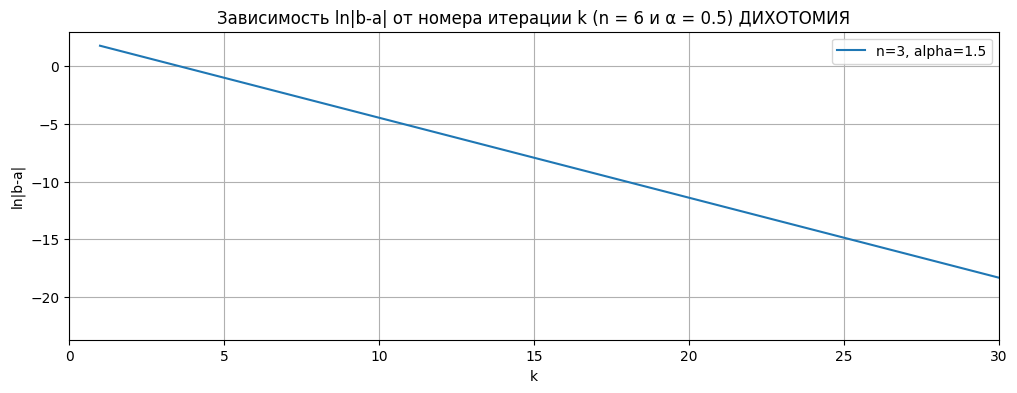

In [35]:
# Создаем пустой список для хранения результатов
results = []

dichotomy_result, err_array, iterations  = dichotomy(alpha, n)
#рименяем логарифм к abs_values
log_err_values = np.log(err_array)  
results.append((n, alpha, dichotomy_result, log_err_values, iterations))

plt.figure(figsize=(12, 4))
plt.plot(iterations, log_err_values, label=f'n={n}, alpha={alpha}')
plt.xlabel('k')
plt.ylabel('ln|b-a|')
plt.title('Зависимость ln|b-a| от номера итерации k (n = 6 и α = 0.5) ДИХОТОМИЯ')
plt.legend()
plt.grid(True)
plt.xlim(0, 30)
plt.show()

In [36]:
log_err_values

array([  1.77495235,   1.08180517,   0.38865799,  -0.30448919,
        -0.99763637,  -1.69078355,  -2.38393073,  -3.07707791,
        -3.77022509,  -4.46337227,  -5.15651945,  -5.84966664,
        -6.54281382,  -7.235961  ,  -7.92910818,  -8.62225536,
        -9.31540254, -10.00854972, -10.7016969 , -11.39484408,
       -12.08799126, -12.78113844, -13.47428562, -14.1674328 ,
       -14.86057998, -15.55372716, -16.24687434, -16.94002152,
       -17.6331687 , -18.32631588, -19.01946305, -19.71261023,
       -20.40575741, -21.09890467, -21.79205185, -22.48519871])

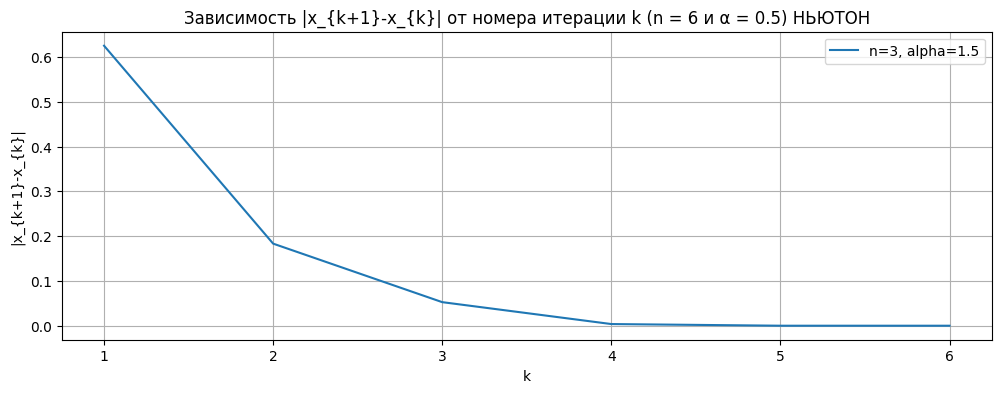

[1, 2, 3, 4, 5, 6]

In [37]:
# Создаем пустой список для хранения результатов
results = []

newton_result, err_array, iterations  = newton(alpha, n)

plt.figure(figsize=(12, 4))
plt.plot(iterations, err_array, label=f'n={n}, alpha={alpha}')
plt.xlabel('k')
plt.ylabel('|x_{k+1}-x_{k}|')
plt.title('Зависимость |x_{k+1}-x_{k}| от номера итерации k (n = 6 и α = 0.5) НЬЮТОН')
plt.legend()
plt.grid(True)
plt.show()

iterations

In [38]:
err_array

[0.625,
 0.18323366394399065,
 0.05261344308889271,
 0.003722613011550191,
 1.7357179245780507e-05,
 3.752521626765315e-10]

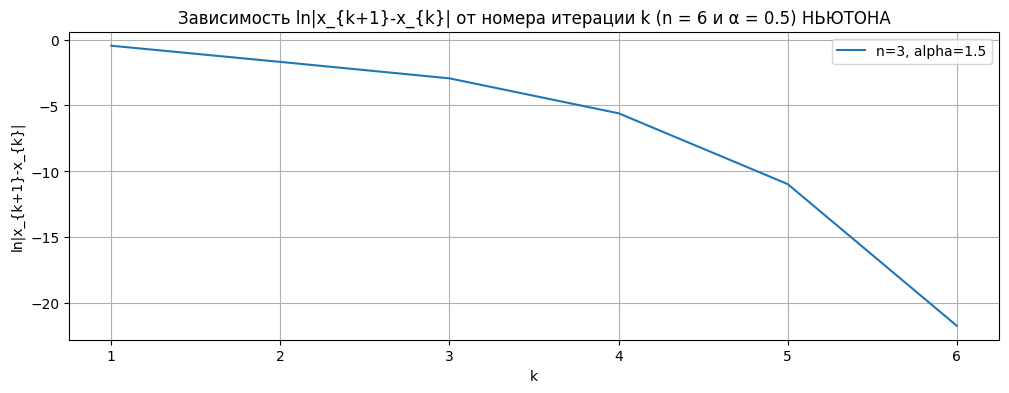

In [39]:
# Создаем пустой список для хранения результатов
results = []

newton_result, err_array, iterations  = newton(alpha, n)

log_err_values = np.log(err_array)  
results.append((n, alpha, newton_result, log_err_values, iterations))

plt.figure(figsize=(12, 4))
plt.plot(iterations, log_err_values, label=f'n={n}, alpha={alpha}')
plt.xlabel('k')
plt.ylabel('ln|x_{k+1}-x_{k}|')
plt.title('Зависимость ln|x_{k+1}-x_{k}| от номера итерации k (n = 6 и α = 0.5) НЬЮТОНА')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
log_err_values

array([ -0.47000363,  -1.69699309,  -2.94478362,  -5.59332943,
       -10.96150435, -21.70342288])

### ❗❗❗ ЛАБОРАТОРНАЯ 2 ❗❗❗ ###

In [41]:
def find_singularPoints(n):
    ys = []  # Создаем пустой список для хранения значений ys
    for alpha in alpha_arr:
        ys_temp, err_array, iterations = newton(alpha, n)
        ys.append(ys_temp)  # Вычисляем ys для каждого alpha
    return ys

# Создаем пустые списки для x* при разных значениях n
xs_2 = find_singularPoints(2)
xs_4 = find_singularPoints(4)
xs_6 = find_singularPoints(6)

xs_2

[0.3721635051878644,
 0.4205133309877985,
 0.4662230354259364,
 0.47675320502567137,
 0.49211786897435345,
 0.5273104818188649,
 0.5359579772380337,
 0.5525391387979185,
 0.618233321223862,
 0.6201626166074973,
 0.6557553379574211,
 0.6637661645088685,
 0.7913518760668262,
 0.8147721618639662,
 0.82228697648463,
 0.8399175484442579,
 0.8916769507162219,
 0.9317476706260842,
 1.0110450760688874,
 1.0185523626207482,
 1.0199930154022276,
 1.0204074782061991,
 1.0493820693092175,
 1.1132653742868022,
 1.1165493528440593,
 1.180565343395464,
 1.184968031749347,
 1.1937102999433231,
 1.2086672644741063,
 1.2228769230624663,
 1.235745108668664,
 1.2578109949530258,
 1.2601009497317206,
 1.2783597336967372,
 1.287170008126411,
 1.3124163887609905,
 1.326941498199569,
 1.3606737052885958,
 1.3856587025521743,
 1.4152688684852452,
 1.418443926070263,
 1.4283029422539826,
 1.4358341806799764,
 1.4465781853454995,
 1.4733941180416468,
 1.4874758703617945,
 1.4883636095632227,
 1.5150393164184481,

In [42]:
def tau_func(x, alpha, n):
    tmp = n * (1 - x * alpha) 
    if 1/tmp >= -1 and 1/tmp <= 1:
        res = math.acos(1/tmp) * (1/ math.sqrt(tmp * tmp - 1))
    else:
        res = 0
    if(res > 0):
        return res
    if(res < 0):
        return -res

print(xs_2[5], alpha_arr[5])

0.5273104818188649 0.6739325066705539


0.689871176429546 0.3721635051878644 0.42371026253307187


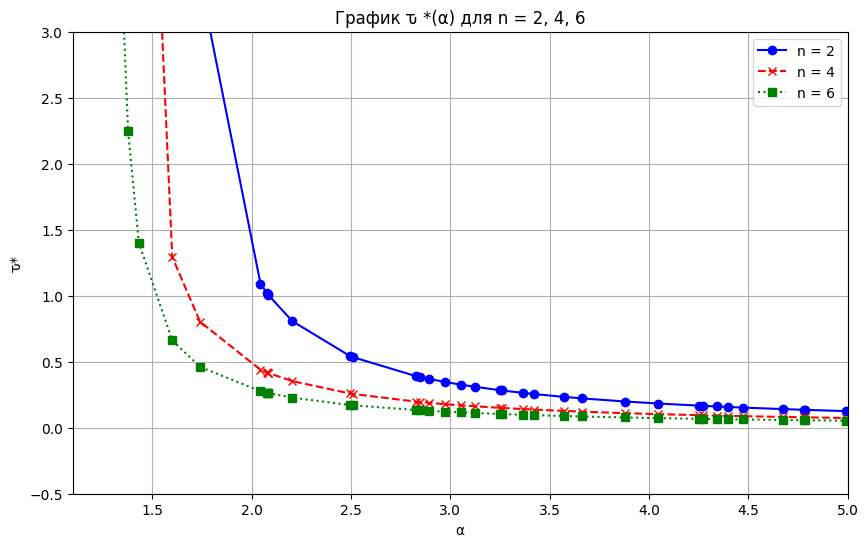

In [45]:
def plot_tau(xs, n):
    ys = []  # Создаем пустой список для хранения значений ys
    it = 0;
    for alpha in alpha_arr:
        ys_temp = tau_func(xs[it], alpha, n)
        ys.append(ys_temp)  # Вычисляем ys для каждого alpha
        it = it + 1
        #print(it)
    return ys

for i in range(len(alpha_arr) - 1, -1, -1):
    if alpha_arr[i] < 1:
        last_index = i
        break
        
filtered_alpha = [x for x in alpha_arr if x >= 1]

# Создаем пустые списки для ys при разных значениях n
ys_2 = plot_tau(xs_2, 2)
ys_4 = plot_tau(xs_4, 4)
ys_6 = plot_tau(xs_6, 6)

arr2 = ys_2[last_index + 1:]
arr4 = ys_4[last_index + 1:]
arr6 = ys_6[last_index + 1:]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(filtered_alpha, arr2, marker='o', linestyle='-', color='b', label='n = 2')
plt.plot(filtered_alpha, arr4, marker='x', linestyle='--', color='r', label='n = 4')
plt.plot(filtered_alpha, arr6, marker='s', linestyle=':', color='g', label='n = 6')
plt.xlabel('α')
plt.ylabel('ԏ*')
plt.title('График ԏ *(α) для n = 2, 4, 6')
plt.legend()
plt.grid(True)
plt.xlim(1.1, 5)
plt.ylim(-0.5, 3)

print(ys_2[0], xs_2[0], alpha_arr[0])


##### 

### ❗❗❗ ЛАБОРАТОРНАЯ 3 ❗❗❗ ###

In [7]:
def plot_graph3_n1(x_arr):
    # Построение графика
    plt.figure(figsize=(4, 2))
    
    # График x_arr[0] от t_arr[0]
    plt.plot(t_arr[0], x_arr[0], label='h = 0.1')
    # График x_arr[1] от t_arr[1]
    plt.plot(t_arr[1], x_arr[1], label='h = 0.01')
    # График x_arr[2] от t_arr[2]
    plt.plot(t_arr[2], x_arr[2], label='h = 0.001')
    
    plt.title('x(t)')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [8]:
def plot_diff_h(x_arr, t_arr, x_true_arr):
    abs_arr = [[] for _ in range(3)]
    lg_abs_arr = [[] for _ in range(3)]
    time_log_arr = [[] for _ in range(3)]
    
    vector1 = [[] for _ in range(3)]
    vector2 = [[] for _ in range(3)]
    
    vector1[0] = np.array(x_arr[0])
    vector1[1] = np.array(x_arr[1])
    vector1[2] = np.array(x_arr[2])
    
    vector2[0] = np.array(x_true_arr[0])
    vector2[1] = np.array(x_true_arr[1])
    vector2[2] = np.array(x_true_arr[2])
       
    abs_arr[0] = np.abs(vector1[0] - vector2[0])
    abs_arr[1] = np.abs(vector1[1] - vector2[1])
    abs_arr[2] = np.abs(vector1[2] - vector2[2])
    
    # Построение графика
    plt.figure(figsize=(4, 2))
    # График abs_arr[0] от t_arr[0]
    plt.plot(t_arr[0], abs_arr[0], label='h = 0.1')
    # График abs_arr[1] от t_arr[1]
    plt.plot(t_arr[1], abs_arr[1], label='h = 0.01')
    # График abs_arr[2] от t_arr[2]
    plt.plot(t_arr[2], abs_arr[2], label='h = 0.001')

    plt.xlabel('t')
    plt.ylabel('Absolute Difference')
    plt.title('|...(t)|')
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
def plot_diff_h_n2(x_arr, y_arr, t_arr, x_true_arr, y_true_arr):
    ksi_n = [[] for _ in range(3)]
    
    vector1_x = [[] for _ in range(3)]
    vector2_x = [[] for _ in range(3)]
    
    vector1_y = [[] for _ in range(3)]
    vector2_y = [[] for _ in range(3)]
    
    differences_x = [[] for _ in range(3)]
    differences_y = [[] for _ in range(3)]

    vector1_x[0] = np.array(x_arr[0])
    vector1_x[1] = np.array(x_arr[1])
    vector1_x[2] = np.array(x_arr[2])

    vector2_x[0] = np.array(x_true_arr[0])
    vector2_x[1] = np.array(x_true_arr[1])
    vector2_x[2] = np.array(x_true_arr[2])

    # Вычисляем разницу между элементами одного индекса
    differences_x[0] = np.abs(vector1_x[0] - vector2_x[0])
    differences_x[1] = np.abs(vector1_x[1] - vector2_x[1])
    differences_x[2] = np.abs(vector1_x[2] - vector2_x[2])

    vector1_y[0] = np.array(y_arr[0])
    vector1_y[1] = np.array(y_arr[1])
    vector1_y[2] = np.array(y_arr[2])

    vector2_y[0] = np.array(y_true_arr[0])
    vector2_y[1] = np.array(y_true_arr[1])
    vector2_y[2] = np.array(y_true_arr[2])

    # Вычисляем разницу между элементами одного индекса
    differences_y[0] = np.abs(vector1_y[0] - vector2_y[0])
    differences_y[1] = np.abs(vector1_y[1] - vector2_y[1])
    differences_y[2] = np.abs(vector1_y[2] - vector2_y[2])

    for i in range(len(t_arr[0])):
        ksi_n[0].append(np.sqrt(differences_x[0][i] * differences_x[0][i] + differences_y[0][i] * differences_y[0][i]))
    for i in range(len(t_arr[1])):
        ksi_n[1].append(np.sqrt(differences_x[1][i] * differences_x[2][i] + differences_y[1][i] * differences_y[1][i]))
    for i in range(len(t_arr[2])):
        ksi_n[2].append(np.sqrt(differences_x[2][i] * differences_x[2][i] + differences_y[2][i] * differences_y[2][i]))

    # Построение графика
    plt.figure(figsize=(4, 2))
    plt.plot(t_arr[0], ksi_n[0], label='h = 0.1')
    plt.plot(t_arr[1], ksi_n[1], label='h = 0.01')
    plt.plot(t_arr[2], ksi_n[2], label='h = 0.001')

    # Добавление заголовков и подписей осей
    plt.xlabel('t')
    plt.ylabel('ξ')
    plt.title('График ξ(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
def plot_lg_diff_h(x_arr, t_arr, x_true_arr):
    abs_arr = [[] for _ in range(3)]
    lg_abs_arr = [[] for _ in range(3)]
    time_log_arr = [[] for _ in range(3)]
        
    time_log_arr[0] = (t_arr[0])[:]
    time_log_arr[1] = (t_arr[1])[:]
    time_log_arr[2] = (t_arr[2])[:]
    time_log_arr[0].pop(0)
    time_log_arr[1].pop(0)
    time_log_arr[2].pop(0) 
    
    vector1 = [[] for _ in range(3)]
    vector2 = [[] for _ in range(3)]
    
    vector1[0] = np.array(x_arr[0])
    vector1[1] = np.array(x_arr[1])
    vector1[2] = np.array(x_arr[2])
    
    vector2[0] = np.array(x_true_arr[0])
    vector2[1] = np.array(x_true_arr[1])
    vector2[2] = np.array(x_true_arr[2])
    
    abs_arr[0] = np.abs(vector1[0] - vector2[0])
    abs_arr[1] = np.abs(vector1[1] - vector2[1])
    abs_arr[2] = np.abs(vector1[2] - vector2[2])
    abs_arr[0] = np.delete(abs_arr[0], 0)
    abs_arr[1] = np.delete(abs_arr[1], 0)
    abs_arr[2] = np.delete(abs_arr[2], 0)
    
    lg_abs_arr[0] = np.log(abs_arr[0])
    lg_abs_arr[1] = np.log(abs_arr[1])
    lg_abs_arr[2] = np.log(abs_arr[2])
    
    # Построение графика
    plt.figure(figsize=(5, 3))
    # График abs_arr[0] от t_arr[0]
    plt.plot(time_log_arr[0], lg_abs_arr[0], label='h = 0.1')
    # График abs_arr[1] от t_arr[1]
    plt.plot(time_log_arr[1], lg_abs_arr[1], label='0.01')
    # График abs_arr[2] от t_arr[2]
    plt.plot(time_log_arr[2], lg_abs_arr[2], label='0.001')

    plt.xlabel('t')
    plt.ylabel('lg Absolute Difference')
    plt.title('lg|...(t)|')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def plot_lg_ksi_n2(x_arr, y_arr, t_arr, x_true_arr, y_true_arr):
    ksi_n = [[] for _ in range(3)]
    
    vector1_x = [[] for _ in range(3)]
    vector2_x = [[] for _ in range(3)]
    
    vector1_y = [[] for _ in range(3)]
    vector2_y = [[] for _ in range(3)]
    
    differences_x = [[] for _ in range(3)]
    differences_y = [[] for _ in range(3)]

    vector1_x[0] = np.array(x_arr[0])
    vector1_x[1] = np.array(x_arr[1])
    vector1_x[2] = np.array(x_arr[2])

    vector2_x[0] = np.array(x_true_arr[0])
    vector2_x[1] = np.array(x_true_arr[1])
    vector2_x[2] = np.array(x_true_arr[2])

    # Вычисляем разницу между элементами одного индекса
    differences_x[0] = np.abs(vector1_x[0] - vector2_x[0])
    differences_x[1] = np.abs(vector1_x[1] - vector2_x[1])
    differences_x[2] = np.abs(vector1_x[2] - vector2_x[2])

    vector1_y[0] = np.array(y_arr[0])
    vector1_y[1] = np.array(y_arr[1])
    vector1_y[2] = np.array(y_arr[2])

    vector2_y[0] = np.array(y_true_arr[0])
    vector2_y[1] = np.array(y_true_arr[1])
    vector2_y[2] = np.array(y_true_arr[2])

    # Вычисляем разницу между элементами одного индекса
    differences_y[0] = np.abs(vector1_y[0] - vector2_y[0])
    differences_y[1] = np.abs(vector1_y[1] - vector2_y[1])
    differences_y[2] = np.abs(vector1_y[2] - vector2_y[2])

    for i in range(len(t_arr[0])):
        ksi_n[0].append(np.sqrt(differences_x[0][i] * differences_x[0][i] + differences_y[0][i] * differences_y[0][i]))
    for i in range(len(t_arr[1])):
        ksi_n[1].append(np.sqrt(differences_x[1][i] * differences_x[2][i] + differences_y[1][i] * differences_y[1][i]))
    for i in range(len(t_arr[2])):
        ksi_n[2].append(np.sqrt(differences_x[2][i] * differences_x[2][i] + differences_y[2][i] * differences_y[2][i]))
    
    lg_ksi_n = [[] for _ in range(3)]
    lg_abs_arr_x = [[] for _ in range(3)]
    lg_abs_arr_y = [[] for _ in range(3)]
    time_log_arr = [[] for _ in range(3)]
        
    time_log_arr[0] = (t_arr[0])[:]
    time_log_arr[1] = (t_arr[1])[:]
    time_log_arr[2] = (t_arr[2])[:]
    time_log_arr[0].pop(0)
    time_log_arr[1].pop(0)
    time_log_arr[2].pop(0) 
    
    lg_ksi_n[0] = np.log(ksi_n[0])
    lg_ksi_n[1] = np.log(ksi_n[1])
    lg_ksi_n[2] = np.log(ksi_n[2])


    plt.figure(figsize=(6, 3))
    plt.plot(t_arr[0], lg_ksi_n[0], label='h = 0.1')
    plt.plot(t_arr[1], lg_ksi_n[1], label='h = 0.01')
    plt.plot(t_arr[2], lg_ksi_n[2], label='h = 0.001')

    # Добавление заголовков и подписей осей
    plt.xlabel('t')
    plt.ylabel('lgξ')
    plt.title('График lgξ(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def calculate_values_n1(func, f1, x_arr, t_arr, x_true_arr):
    t1, x1 = func(f1, h_arr[0], t0, x0, T)
    t2, x2 = func(f1, h_arr[1], t0, x0, T)
    t3, x3 = func(f1, h_arr[2], t0, x0, T)

    x_arr[0] = (x1)[:]
    x_arr[1] = (x2)[:]
    x_arr[2] = (x3)[:]

    t_arr[0] = t1[:]
    t_arr[1] = t2[:]
    t_arr[2] = t3[:]
    
    x_true_tmp1 = []
    x_true_tmp2 = []
    x_true_tmp3 = []
    
    for time in t_arr[0]:
        x_true_tmp1.append(x1_analytical(time, x0))
    for time in t_arr[1]:
        x_true_tmp2.append(x1_analytical(time, x0))
    for time in t_arr[2]:
        x_true_tmp3.append(x1_analytical(time, x0))
        
    x_true_arr[0] = (x_true_tmp1)[:]
    x_true_arr[1] = (x_true_tmp2)[:]
    x_true_arr[2] = (x_true_tmp3)[:]

In [26]:
def calculate_values_n2(func, f, x_arr, y_arr, t_arr, x_true_arr, y_true_arr):
    t1, x1, y1 = func(f, h_arr[0], t0, x0, y0, T)
    t2, x2, y2 = func(f, h_arr[1], t0, x0, y0, T)
    t3, x3, y3 = func(f, h_arr[2], t0, x0, y0, T)

    x_arr[0] = (x1)[:]
    x_arr[1] = (x2)[:]
    x_arr[2] = (x3)[:]

    y_arr[0] = (y1)[:]
    y_arr[1] = (y2)[:]
    y_arr[2] = (y3)[:]

    t_arr[0] = t1[:]
    t_arr[1] = t2[:]
    t_arr[2] = t3[:]

    x_true_arr_tmp1 = []
    x_true_arr_tmp2 = []
    x_true_arr_tmp3 = []

    y_true_arr_tmp1 = []
    y_true_arr_tmp2 = []
    y_true_arr_tmp3 = []
    
    for time in t_arr[0]:
        x_tmp, y_tmp = x3_analytical(time, x0, y0)
        x_true_arr_tmp1.append(x_tmp)
        y_true_arr_tmp1.append(y_tmp)
    for time in t_arr[1]:
        x_tmp, y_tmp = x3_analytical(time, x0, y0)
        x_true_arr_tmp2.append(x_tmp)
        y_true_arr_tmp2.append(y_tmp)
    for time in t_arr[2]:
        x_tmp, y_tmp = x3_analytical(time, x0, y0)
        x_true_arr_tmp3.append(x_tmp)
        y_true_arr_tmp3.append(y_tmp)
    
    x_true_arr[0] = (x_true_arr_tmp1)[:]
    x_true_arr[1] = (x_true_arr_tmp2)[:]
    x_true_arr[2] = (x_true_arr_tmp3)[:]

    y_true_arr[0] = (y_true_arr_tmp1)[:]
    y_true_arr[1] = (y_true_arr_tmp2)[:]
    y_true_arr[2] = (y_true_arr_tmp3)[:]

In [14]:
def calculate_max_diff_n1(x_arr, x_true_arr):
    vector1 = [[] for _ in range(3)]
    vector2 = [[] for _ in range(3)]
    differences = [[] for _ in range(3)]
    max_difference = np.zeros(3)
    
    vector1[0] = np.array(x_arr[0])
    vector1[1] = np.array(x_arr[1])
    vector1[2] = np.array(x_arr[2])
    
    vector2[0] = np.array(x_true_arr[0])
    vector2[1] = np.array(x_true_arr[1])
    vector2[2] = np.array(x_true_arr[2])

    # Вычисляем разницу между элементами одного индекса
    differences[0] = np.abs(vector1[0] - vector2[0])
    differences[1] = np.abs(vector1[1] - vector2[1])
    differences[2] = np.abs(vector1[2] - vector2[2])

    # Находим максимальную разницу
    max_difference[0] = np.max(differences[0])
    max_difference[1] = np.max(differences[1])
    max_difference[2] = np.max(differences[2])

    print(max_difference[0])
    print(max_difference[1])
    print(max_difference[2])

## x` = -x

In [8]:
h_arr = [0.1, 0.01, 0.001]
t0 = 0
x0 = 1
T = 100

x_arr = [[] for _ in range(3)]
t_arr = [[] for _ in range(3)]

x_true_arr = [[] for _ in range(3)]

In [9]:
def f1(x):
    return -x

def x1_analytical(t, x0):
    return x0 * np.exp(-t)

In [10]:
def method_Euler(f, h, t0, x0, T):
    t = [t0]
    x = [x0]
    while t[-1] < T:
        t.append(t[-1] + h)     
        x.append(x[-1] + h * f(x[-1]))
    
    return t, x

In [53]:
calculate_values_n1(method_Euler, f1, x_arr, t_arr, x_true_arr)

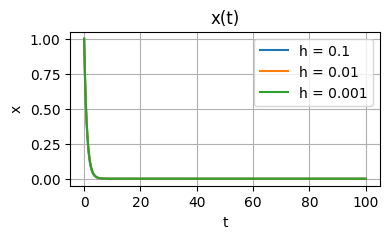

In [54]:
plot_graph3_n1(x_arr)

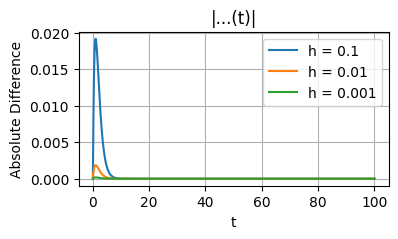

In [55]:
plot_diff_h(x_arr, t_arr, x_true_arr)

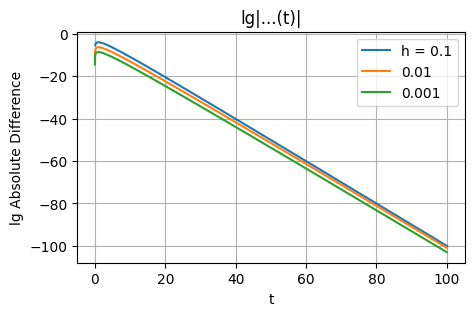

In [56]:
plot_lg_diff_h(x_arr, t_arr, x_true_arr)

In [57]:
calculate_max_diff_n1(x_arr, x_true_arr)

0.019201001071442403
0.0018470998982124676
0.00018401640047832624


In [11]:
def method_RK4(f, h, t0, x0, T):
    t = [t0]
    x = [x0]
    
    while t[-1] < T:
        k1 = h * f(x[-1])
        k2 = h * f(x[-1] + 0.5 * k1)
        k3 = h * f(x[-1] + 0.5 * k2)
        k4 = h * f(x[-1] + k3)
        
        x.append(x[-1] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4))
        t.append(t[-1] + h)
    
    return t, x

In [12]:
calculate_values_n1(method_RK4, f1, x_arr, t_arr, x_true_arr)

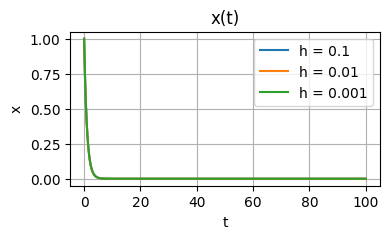

In [14]:
plot_graph3_n1(x_arr)

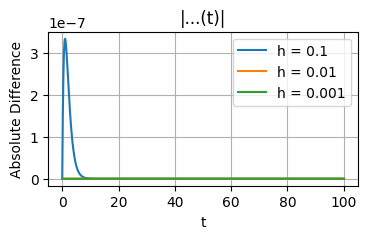

In [15]:
plot_diff_h(x_arr, t_arr, x_true_arr)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_13964\724912096.py:33: RuntimeWarning: divide by zero encountered in log
  lg_abs_arr[2] = np.log(abs_arr[2])


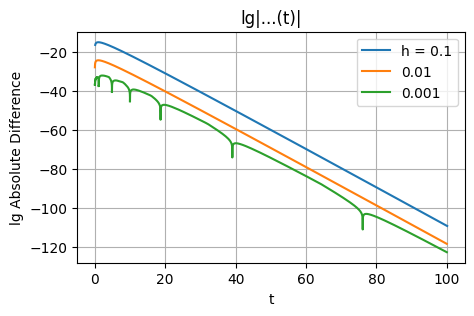

In [63]:
plot_lg_diff_h(x_arr, t_arr, x_true_arr)

In [16]:
calculate_max_diff_n1(x_arr, x_true_arr)

3.332410560275001e-07
3.0913327453419015e-11
1.2378986724570495e-14


## 1.2 x` = x

In [23]:
def f2(x):
    return x

def x2_analytical(t, x0):
    return x0 * np.exp(t)

In [24]:
h_arr = [0.1, 0.01, 0.001]
t0 = 0
x0 = 1
T = 100

x_arr = [[] for _ in range(3)]
t_arr = [[] for _ in range(3)]

x_true_arr = [[] for _ in range(3)]

In [25]:
calculate_values_n1(method_Euler, f2, x_arr, t_arr, x_true_arr)

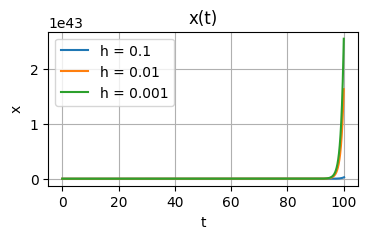

In [26]:
plot_graph3_n1(x_arr)

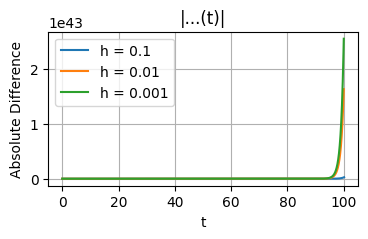

In [27]:
plot_diff_h(x_arr, t_arr, x_true_arr)

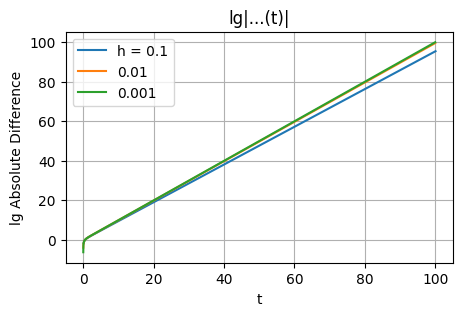

In [28]:
plot_lg_diff_h(x_arr, t_arr, x_true_arr)

In [29]:
calculate_max_diff_n1(x_arr, x_true_arr)

2.716926209806419e+41
1.6358287111888786e+43
2.5571012932150934e+43


In [30]:
calculate_values_n1(method_RK4, f2, x_arr, t_arr, x_true_arr)

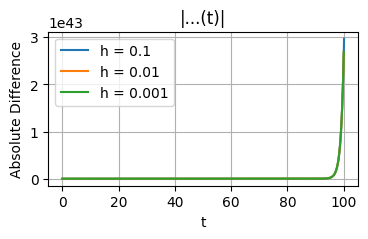

In [32]:
plot_diff_h(x_arr, t_arr, x_true_arr)

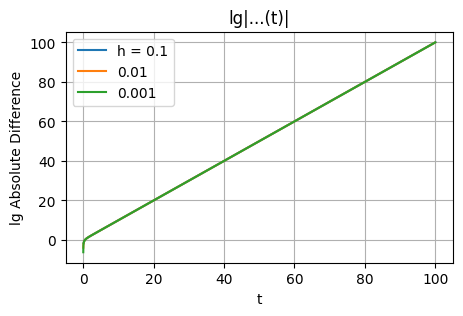

In [33]:
plot_lg_diff_h(x_arr, t_arr, x_true_arr)

In [34]:
calculate_max_diff_n1(x_arr, x_true_arr)

2.970600873192917e+43
2.6881171196010515e+43
2.6881171418138776e+43


## x`` + x = 0

In [16]:
h_arr = [0.1, 0.01, 0.001]
t0 = 0
x0 = 1
y0 = 1
T = 100

x_arr = [[] for _ in range(3)]
y_arr = [[] for _ in range(3)]
t_arr = [[] for _ in range(3)]

x_true_arr = [[] for _ in range(3)]
y_true_arr = [[] for _ in range(3)]

In [17]:
def f3(x, y):
    return [y, -x]

def x3_analytical(t, x0, y0):
    return [x0 * np.cos(t) + y0 * np.sin(t), y0 * np.cos(t) - x0 * np.sin(t)]

In [18]:
def method_Euler2(f, h, t0, x0, y0, T):
    t = [t0]
    x = [x0]
    y = [y0]
    while t[-1] < T:
        t.append(t[-1] + h)   
        y_tmp, x_tmp = f(x[-1], y[-1])
        x.append(x[-1] + h * x_tmp)
        y.append(y[-1] + h * y_tmp)
    
    return t, x, y

In [19]:
calculate_values_n2(method_Euler2, f3, x_arr, y_arr, t_arr, x_true_arr, y_true_arr)

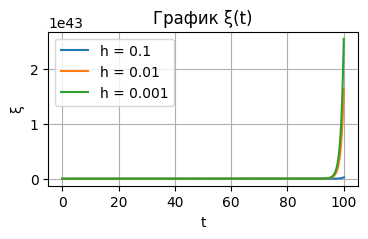

In [20]:
plot_diff_h_n2(x_arr, y_arr, t_arr, x_true_arr, y_true_arr)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\120374319.py:58: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\120374319.py:59: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\120374319.py:60: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


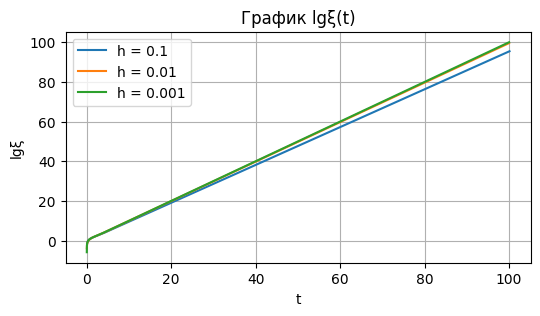

In [21]:
plot_lg_ksi_n2(x_arr, y_arr, t_arr, x_true_arr, y_true_arr)

In [29]:
def method_RK4_2(f, h, t0, x0, y0, T):
    t = [t0]
    x = [x0]
    y = [y0]
    
    while t[-1] < T:
        y_tmp, x_tmp = f(x[-1], y[-1])
        
        k1_x = h * x_tmp
        k1_y = h * y_tmp
        
        y_tmp, x_tmp = f(x[-1] + 0.5 * k1_x, y[-1] + 0.5 * k1_y)
        k2_x = h * x_tmp
        k2_y = h * y_tmp
        
        y_tmp, x_tmp = f(x[-1] + 0.5 * k2_x, y[-1] + 0.5 * k2_y)
        k3_x = h * x_tmp
        k3_y = h * y_tmp
        
        y_tmp, x_tmp = f(x[-1] + k3_x, y[-1] + k3_y)
        k4_x = h * x_tmp
        k4_y = h * y_tmp
        
        x.append(x[-1] + (1/6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x))
        y.append(t[-1] + (1/6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y))
        t.append(t[-1] + h)
    
    return t, x, y

In [30]:
calculate_values_n2(method_RK4_2, f3, x_arr, y_arr, t_arr, x_true_arr, y_true_arr)

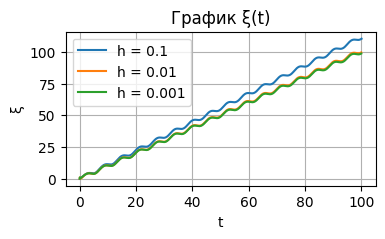

In [31]:
plot_diff_h_n2(x_arr, y_arr, t_arr, x_true_arr, y_true_arr)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\120374319.py:58: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\120374319.py:59: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\120374319.py:60: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


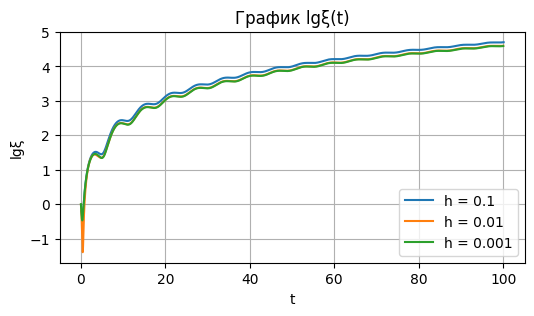

In [32]:
plot_lg_ksi_n2(x_arr, y_arr, t_arr, x_true_arr, y_true_arr)

## Система Ресслера

In [186]:
def calculate_values_Resler(func, x1_arr, y1_arr, z1_arr, t1_arr, h_arr, x0, y0, z0, t0):
    t1, x1, y1, z1 = func(h_arr[0], t0, x0, y0, z0, T)
    t2, x2, y2, z2 = func(h_arr[1], t0, x0, y0, z0, T)
    t3, x3, y3, z3 = func(h_arr[2], t0, x0, y0, z0, T)

    x1_arr[0] = (x1)[:]
    x1_arr[1] = (x2)[:]
    x1_arr[2] = (x3)[:]
    
    y1_arr[0] = (y1)[:]
    y1_arr[1] = (y2)[:]
    y1_arr[2] = (y3)[:]
    
    z1_arr[0] = (z1)[:]
    z1_arr[1] = (z2)[:]
    z1_arr[2] = (z3)[:]

    t1_arr[0] = t1[:]
    t1_arr[1] = t2[:]
    t1_arr[2] = t3[:]

In [187]:
a = 0.2
b = 0.2
c = 5.7

t0 = 0
x0 = -3
y0 = -3
z0 = -3

T = 100

h1_arr = [0.1, 0.01, 0.001]
h2_arr = [0.05, 0.005, 0.0005]

x1_arr = [[] for _ in range(3)]
y1_arr = [[] for _ in range(3)]
z1_arr = [[] for _ in range(3)]

x2_arr = [[] for _ in range(3)]
y2_arr = [[] for _ in range(3)]
z2_arr = [[] for _ in range(3)]

t1_arr = [[] for _ in range(3)]
t2_arr = [[] for _ in range(3)]

def func_Resler(x, y, z):
    return [-y - z, x + a * y, b + z * (x - c)]

In [188]:
def method_Euler4(h, t0, x0, y0, z0, T):
    t = [t0]
    x = [x0]
    y = [y0]
    z = [z0]
    while t[-1] < T:
        x_tmp, y_tmp, z_tmp = func_Resler(x[-1], y[-1], z[-1])
        x.append(x[-1] + h * x_tmp)
        y.append(x[-1] + h * y_tmp)
        z.append(x[-1] + h * z_tmp)
        t.append(t[-1] + h)
    
    return t, x, y, z

In [189]:
calculate_values_Resler(method_Euler4, x1_arr, y1_arr, z1_arr, t1_arr, h1_arr, x0, y0, z0, t0)
calculate_values_Resler(method_Euler4, x2_arr, y2_arr, z2_arr, t2_arr, h2_arr, x0, y0, z0, t0)

In [190]:
ksi_n = [[] for _ in range(3)]

ksi1_tmp = []
ksi2_tmp = []
ksi3_tmp = []

time1 = []
time2 = []
time3 = []

for i in range(len(t1_arr[0]) - 1):
    ksi1_tmp.append((x1_arr[0][i] - x2_arr[0][2 * i]) * (x1_arr[0][i] - x2_arr[0][2 * i]) + (y1_arr[0][i] - y2_arr[0][2 * i]) * (y1_arr[0][i] - y2_arr[0][2 * i]) + (z1_arr[0][i] - z2_arr[0][2 * i]) * (z1_arr[0][i] - z2_arr[0][2 * i]))
    time1.append(t1_arr[0][i])
    
for i in range(len(t1_arr[1]) - 1):
    ksi2_tmp.append((x1_arr[1][i] - x2_arr[1][2 * i]) * (x1_arr[1][i] - x2_arr[1][2 * i]) + (y1_arr[1][i] - y2_arr[1][2 * i]) * (y1_arr[1][i] - y2_arr[1][2 * i]) + (z1_arr[1][i] - z2_arr[1][2 * i]) * (z1_arr[1][i] - z2_arr[1][2 * i]))
    time2.append(t1_arr[1][i])
    
for i in range(len(t1_arr[2]) - 1):
    ksi3_tmp.append((x1_arr[2][i] - x2_arr[2][2 * i]) * (x1_arr[2][i] - x2_arr[2][2 * i]) + (y1_arr[2][i] - y2_arr[2][2 * i]) * (y1_arr[2][i] - y2_arr[2][2 * i]) + (z1_arr[2][i] - z2_arr[2][2 * i]) * (z1_arr[2][i] - z2_arr[2][2 * i]))
    time3.append(t1_arr[2][i])
    
t1_arr[0] = time1[:]
t1_arr[1] = time2[:]
t1_arr[2] = time3[:]

ksi_n[0] = ksi1_tmp[:]
ksi_n[1] = ksi2_tmp[:]
ksi_n[2] = ksi3_tmp[:]

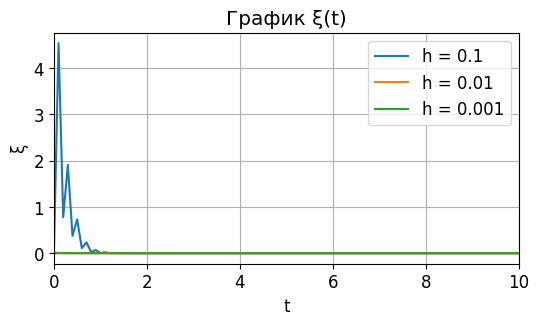

In [191]:
# Построение графика
plt.figure(figsize=(6, 3))
plt.plot(t1_arr[0], ksi_n[0], label='h = 0.1')
plt.plot(t1_arr[1], ksi_n[1], label='h = 0.01')
plt.plot(t1_arr[2], ksi_n[2], label='h = 0.001')

# Добавление заголовков и подписей осей
plt.xlabel('t')
plt.ylabel('ξ')
plt.title('График ξ(t)')
plt.legend()
plt.grid(True)
plt.xlim(0,10)
plt.show()

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\3682447084.py:13: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\3682447084.py:14: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12376\3682447084.py:15: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


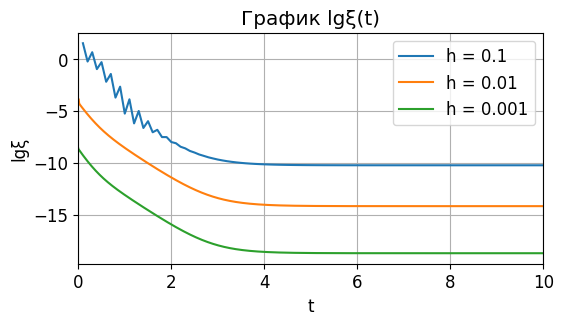

In [192]:
lg_ksi_n = [[] for _ in range(3)]
lg_abs_arr_x = [[] for _ in range(3)]
lg_abs_arr_y = [[] for _ in range(3)]
time_log_arr = [[] for _ in range(3)]
        
time_log_arr[0] = (t1_arr[0])[:]
time_log_arr[1] = (t1_arr[1])[:]
time_log_arr[2] = (t1_arr[2])[:]
time_log_arr[0].pop(0)
time_log_arr[1].pop(0)
time_log_arr[2].pop(0) 
    
lg_ksi_n[0] = np.log(ksi_n[0])
lg_ksi_n[1] = np.log(ksi_n[1])
lg_ksi_n[2] = np.log(ksi_n[2])


plt.figure(figsize=(6, 3))
plt.plot(t1_arr[0], lg_ksi_n[0], label='h = 0.1')
plt.plot(t1_arr[1], lg_ksi_n[1], label='h = 0.01')
plt.plot(t1_arr[2], lg_ksi_n[2], label='h = 0.001')

# Добавление заголовков и подписей осей
plt.xlabel('t')
plt.ylabel('lgξ')
plt.title('График lgξ(t)')
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.show()

In [193]:
# Находим максимальную разницу
max_difference = [[] for _ in range(3)] 

max_difference[0] = np.max(ksi_n[0])
max_difference[1] = np.max(ksi_n[1])
max_difference[2] = np.max(ksi_n[2])

print(max_difference[0])
print(max_difference[1])
print(max_difference[2])

4.535342367499999
0.01984907221967572
0.00017833768926742364


In [198]:
def method_RK4_Resler(h, t0, x0, y0, z0, T):
    t = [t0]
    x = [x0]
    y = [y0]
    z = [z0]
    while t[-1] < T:
        x_tmp, y_tmp, z_tmp = func_Resler(x[-1], y[-1], z[-1])
        
        k1_x = h * x_tmp
        k1_y = h * y_tmp
        k1_z = h * z_tmp
        
        x_tmp, y_tmp, z_tmp = func_Resler(x[-1] + 0.5 * k1_x, y[-1] + 0.5 * k1_y, z[-1] + 0.5 * k1_z)
        k2_x = h * x_tmp
        k2_y = h * y_tmp
        k2_z = h * z_tmp
        
        x_tmp, y_tmp, z_tmp = func_Resler(x[-1] + 0.5 * k2_x, y[-1] + 0.5 * k2_y, z[-1] + 0.5 * k2_z)
        k3_x = h * x_tmp
        k3_y = h * y_tmp
        k3_z = h * z_tmp
        
        x_tmp, y_tmp, z_tmp = func_Resler(x[-1] + k3_x, y[-1] + k3_y, z[-1] + k3_z)
        k4_x = h * x_tmp
        k4_y = h * y_tmp
        k4_z = h * z_tmp
        
        x.append(x[-1] + (1/6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x))
        y.append(t[-1] + (1/6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y))
        z.append(t[-1] + (1/6) * (k1_z + 2 * k2_z + 2 * k3_z + k4_z))
        t.append(t[-1] + h)
    
    return t, x, y, z

In [199]:
calculate_values_Resler(method_RK4_Resler, x1_arr, y1_arr, z1_arr, t1_arr, h1_arr, x0, y0, z0, t0)

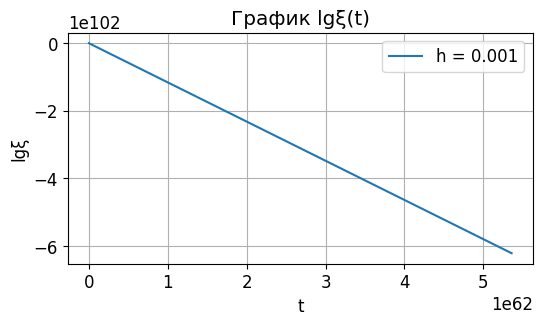

In [203]:
plt.figure(figsize=(6, 3))

plt.plot(y1_arr[0], x1_arr[0], label='h = 0.001')

# Добавление заголовков и подписей осей
plt.xlabel('t')
plt.ylabel('lgξ')
plt.title('График lgξ(t)')
plt.legend()
plt.grid(True)
plt.show()

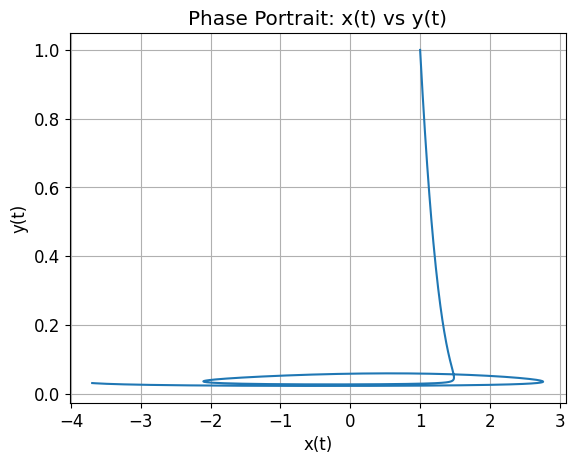

In [206]:
def f(t, u):
    x, y, z = u
    dxdt = -y - z
    dydt = x + 0.2 * y
    dzdt = 0.2 + z * (x - 5.7)
    return np.array([dxdt, dydt, dzdt])

def runge_kutta4(f, t0, initial conditions, h, n):
    t = t0
    u = u0
    results = [u]
    
    for _ in range(n):
        k1 = h * f(t, u)
        k2 = h * f(t + h/2, u + k1/2)
        k3 = h * f(t + h/2, u + k2/2)
        k4 = h * f(t + h, u + k3)
        
        u = u + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
        
        results.append(u)
    
    return np.array(results)

# Начальные условия
t0 = 0
u0 = np.array([1, 1, 1])

# Шаг и количество шагов
h = 0.01
n = 1000

# Решение системы методом Рунге-Кутта 4-го порядка
solution = runge_kutta4(f, t0, u0, h, n)

# Извлечение x(t) и y(t) для построения графика
x_values = solution[:, 0]
y_values = solution[:, 1]
z_values = solution[:, 2]

# Построение графика x(t) от y(t)
plt.figure()
plt.plot(y_values, z_values)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Phase Portrait: x(t) vs y(t)')
plt.grid()
plt.show()

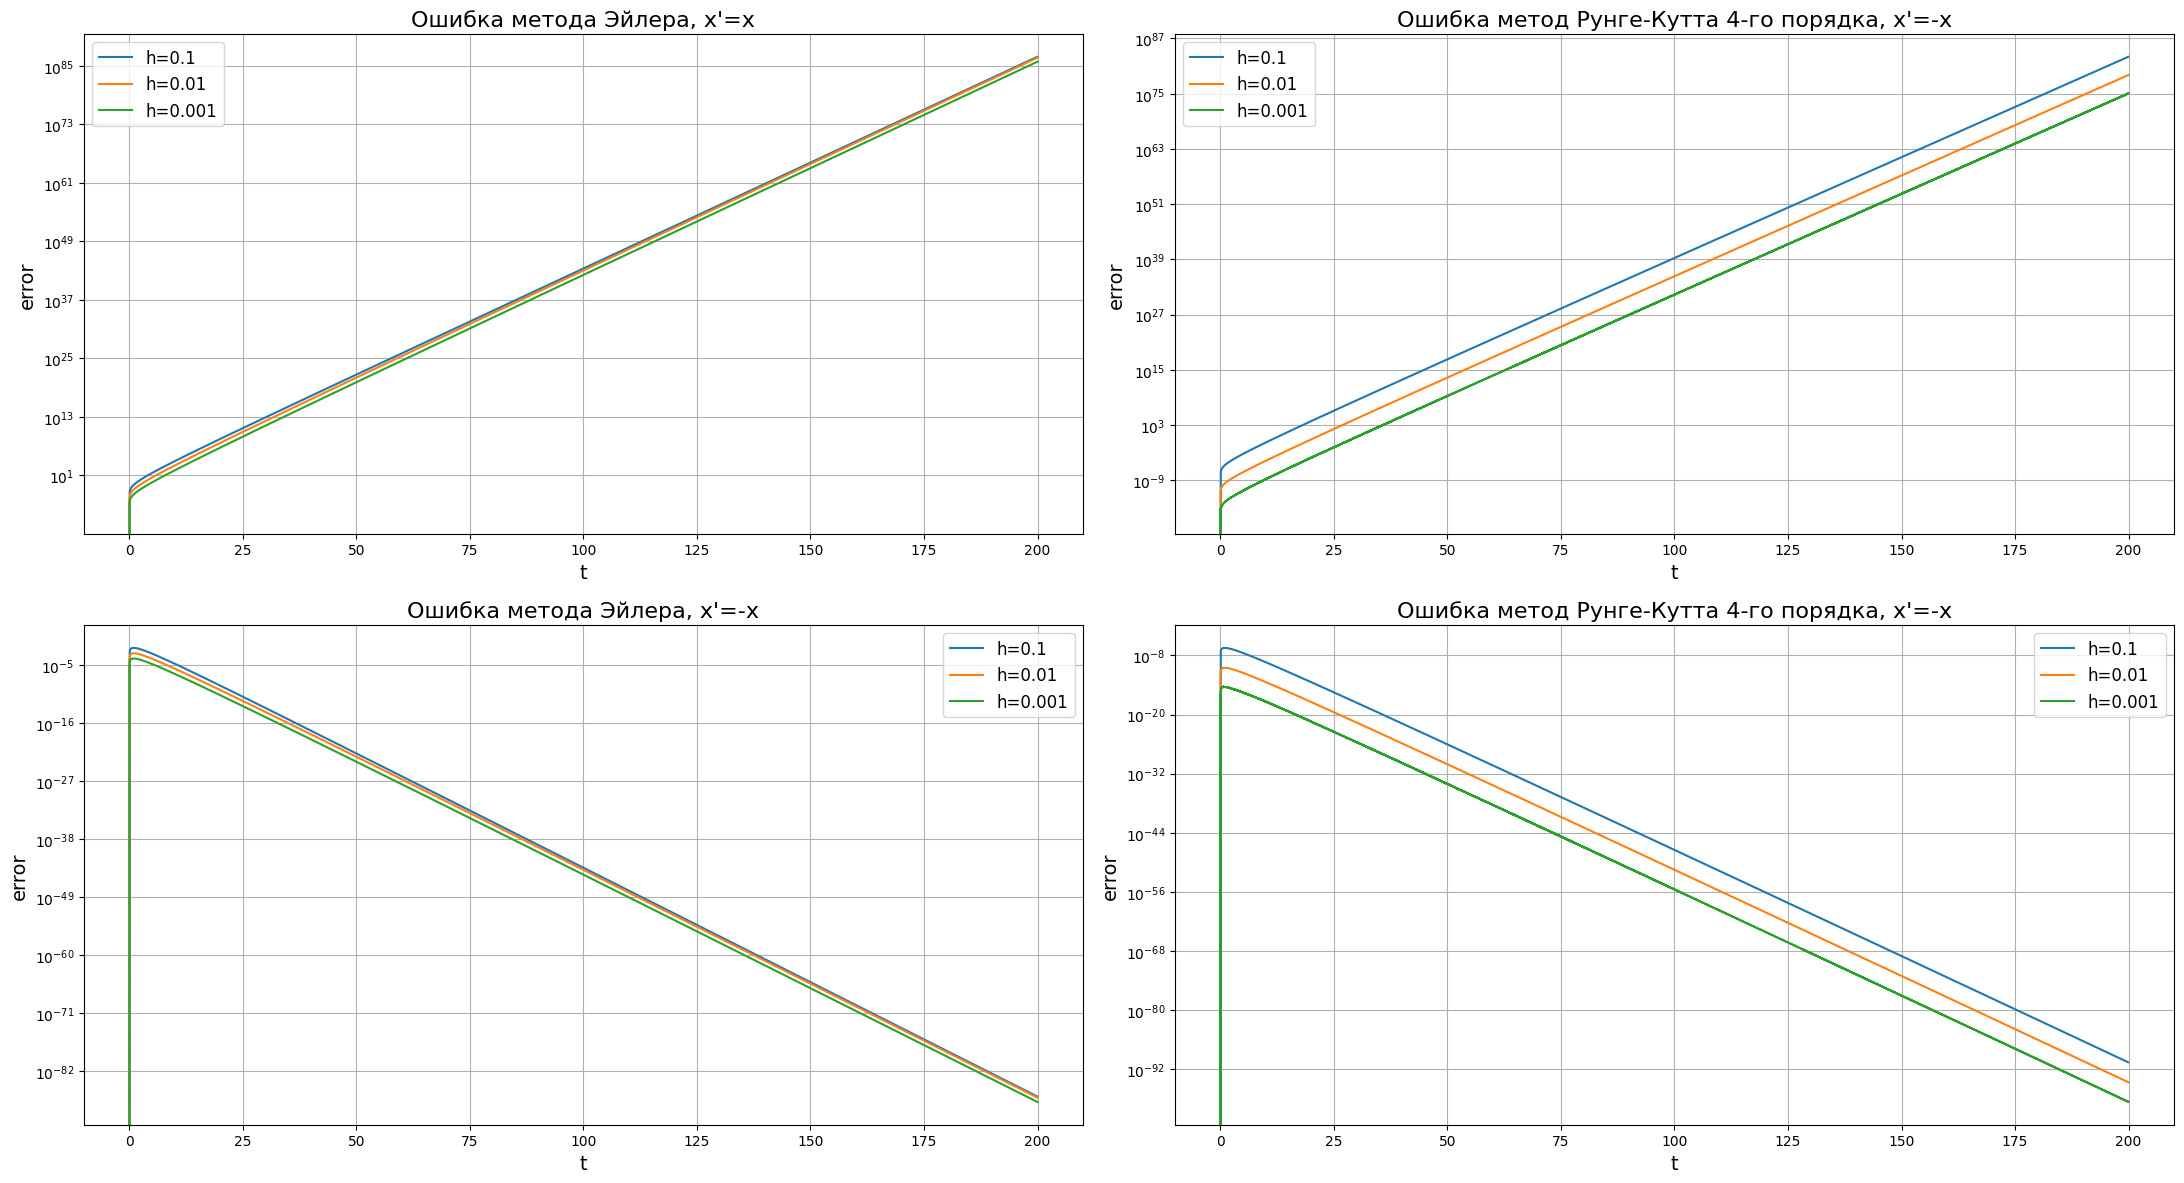

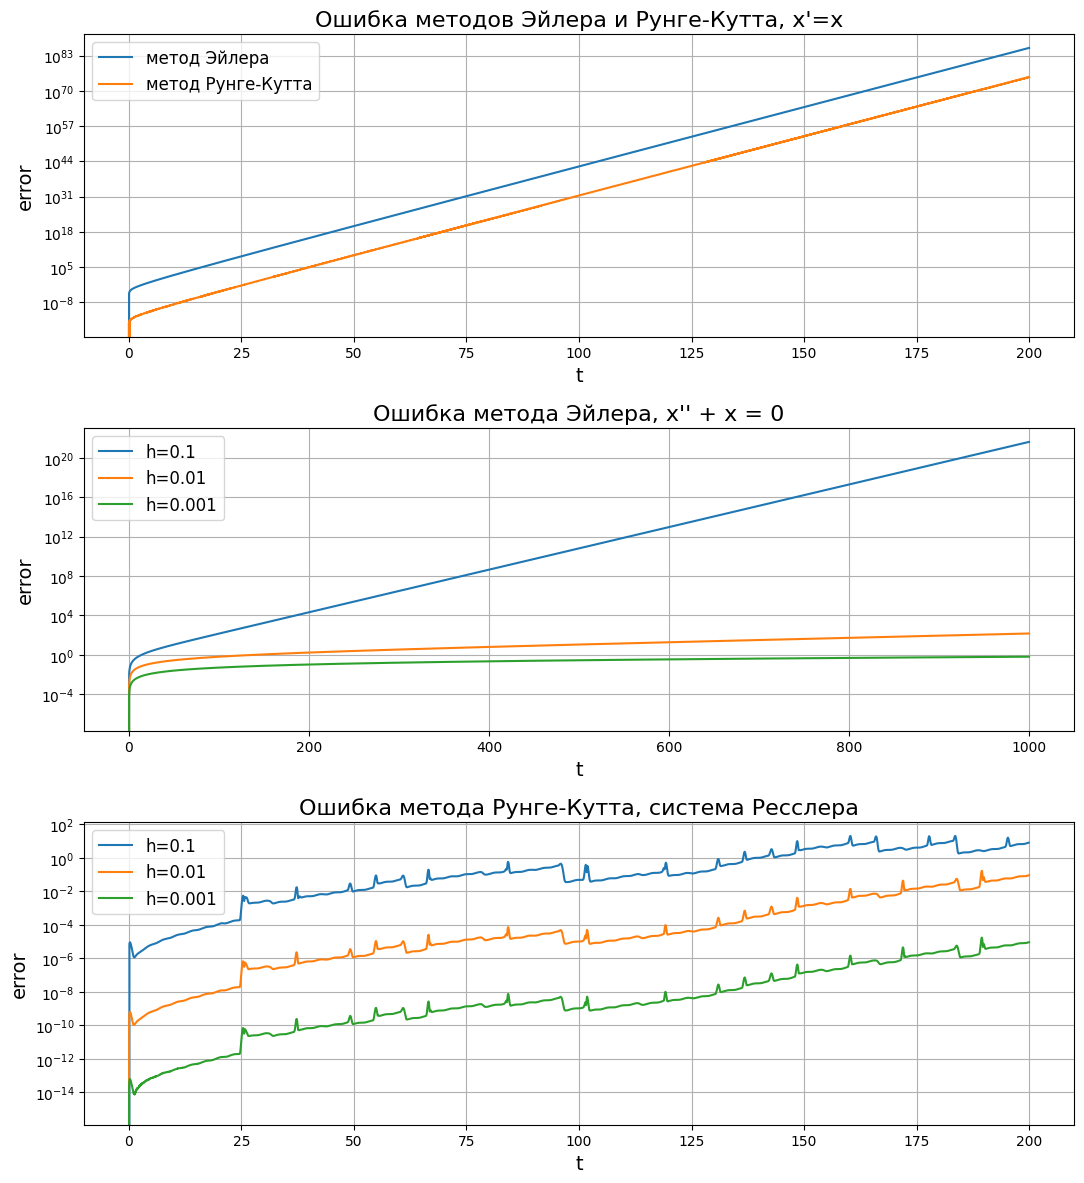

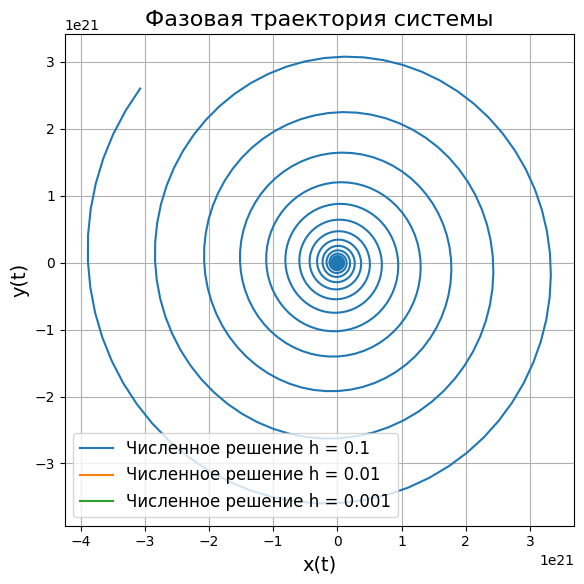

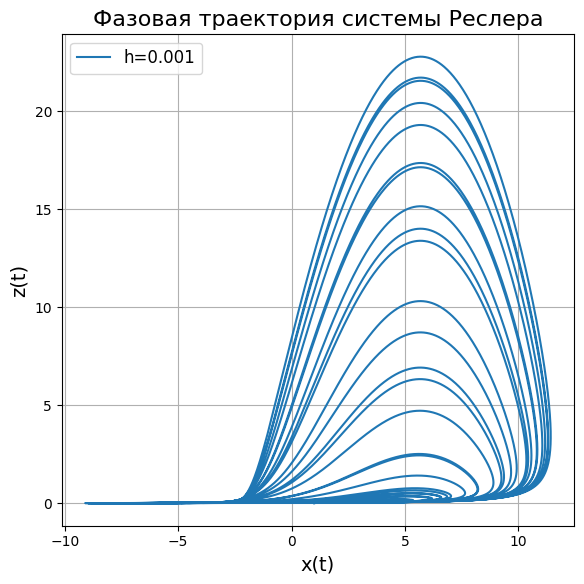

In [166]:
import numpy
import matplotlib.pyplot as plt
from numba import njit
from math import log, exp, sqrt, cos, sin
from numpy.linalg import norm

x0 = numpy.array([1.])
x0_2 = numpy.array([1., 0.])
x0_3 = numpy.array([1., 0.0, 0.])
hs = [0.1, 0.01, 0.001]

@njit
def func1_1(t, xi):
    return xi
    
@njit
def func1_1_sol(t, x0):
    return exp(t)*x0

@njit
def func1_2(t, xi):
    return -xi

@njit
def func1_2_sol(t, x0):
    return exp(-t)*x0

@njit
def func2(t, x0):
    return numpy.array([x0[1], -x0[0]])

@njit
def func2_sol(t, x0):
    return numpy.array([cos(t), -sin(t)])

@njit
def func3(t, tmp):
    x = tmp[0]
    y = tmp[1]
    z = tmp[2]
    return numpy.array([-y-z, x+0.2*y, 0.2+(x-5.7)*z])

@njit
def methodEuler(x, f, h):
    n = len(x)
    for i in range(n-1):
        t = i*h
        x[i+1] = x[i] + h * f(t, x[i])
    return x

@njit
def methodRungeKutta(x, f, h):
    n = len(x)
    for i in range(n-1):
        t = i*h
        k1 = f(t, x[i])
        k2 = f(t + 0.5*h, x[i] + 0.5*h*k1)
        k3 = f(t + 0.5*h, x[i] + 0.5*h*k2)
        k4 = f(t + h, x[i] + h*k3)
        x[i+1] = x[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6.
    return x

def getError(xs, f, ts, x0):
    return [abs(xs[i]-f(ts[i], x0)) for i in range(len(xs))]

@njit
def getError2(xs, f, ts, x0):
    return [norm(xs[i]-f(ts[i], x0)) for i in range(len(xs))]
    
@njit
def getError3(xs1, xs2):
    return [norm(xs1[i]-xs2[2*i]) for i in range(len(xs1))]

# output task
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(22, 12)

res_fig, res_gr = plt.subplots(3)
res_fig.set_size_inches(11, 12)

dop_fig, dop_gr = plt.subplots(1)
dop_fig.set_size_inches(6, 6)

last_fig, last_gr = plt.subplots(1)
last_fig.set_size_inches(6, 6)

gr1, gr2 = ax[0][0], ax[1][0]
gr3, gr4 = ax[0][1], ax[1][1]

def initCond(h, T, x0):
    ts = numpy.arange(0, T, h)
    n = int(0.5 + T / h)
    xs = numpy.zeros(shape=(n, len(x0)), dtype=numpy.float64)
    xs[0] = x0
    return xs, ts

i = 0
for h in hs:   
    # task 1
    xs, ts = initCond(h, 200.0, x0)
    methodEuler(xs, func1_1, h)
    gr1.plot(ts, getError(xs, func1_1_sol, ts, x0), label="h="+str(h))
    if h == hs[-1]:
        res_gr[0].plot(ts, getError(xs, func1_1_sol, ts, x0), label='метод Эйлера')
    
    methodRungeKutta(xs, func1_1, h)
    gr3.plot(ts, getError(xs, func1_1_sol, ts, x0), label="h="+str(h))
    if h == hs[-1]:
        res_gr[0].plot(ts, getError(xs, func1_1_sol, ts, x0), label='метод Рунге-Кутта')
    
    methodEuler(xs, func1_2, h)
    gr2.plot(ts, getError(xs, func1_2_sol, ts, x0), label="h="+str(h))
    
    methodRungeKutta(xs, func1_2, h)
    gr4.plot(ts, getError(xs, func1_2_sol, ts, x0), label="h="+str(h))
    
    # task 2
    xs, ts = initCond(h, 1000.0, x0_2)
    methodEuler(xs, func2, h)
    res_gr[1].plot(ts, getError2(xs, func2_sol, ts, x0_2), label="h="+str(h))
    #methodRungeKutta(xs, func2, h)
    #res_gr[1].plot(ts, getError2(xs, func2_sol, ts, x0_2), label="h="+str(h))
    ts = numpy.arange(0, 7, h)
    #if h == 0.1:
    #    x1 = [func2_sol(t, x0_2)[0] for t in ts]
    #    x2 = [func2_sol(t, x0_2)[1] for t in ts]
    #    dop_gr.plot(x1, x2, label="Аналитическое решение")#$x_0$=0, $y_0$=0
    x1 = [xs[i][0] for i in range(len(xs))]
    x2 = [xs[i][1] for i in range(len(xs))]
    dop_gr.plot(x1, x2, label="Численное решение h = "+str(h))
    # task 3
    T = 200.0
    xs1, ts1 = initCond(h, T, x0_3)
    methodRungeKutta(xs1, func3, h)
    #
    xs2, ts2 = initCond(h/2., T, x0_3)
    methodRungeKutta(xs2, func3, h/2.)
    res_gr[2].plot(ts1, getError3(xs1, xs2), label="h="+str(h)) 
    if h == 0.001:
        st = 0#900
        ts = numpy.arange(st, T, h)
        x1 = [xs1[i][0] for i in range(st*1000, len(xs1))]
        x2 = [xs1[i][2] for i in range(st*1000, len(xs1))]
        last_gr.plot(x1, x2, label="h="+str(h))#,'.b', markersize='0.4')
        
        #x1 = [xs2[2*i][0] for i in range(st*1000, len(xs1))]
        #x2 = [xs2[2*i][2] for i in range(st*1000, len(xs1))]
        #last_gr.plot(ts, x1, label="h="+str(h/2))
    i+=1

plt.rcParams.update({'font.size': 12})

def initGraph(gr, name, x='t', y='error'):
    if name != "Фазовая траектория системы" and name != "Фазовая траектория системы Реслера":
        gr.set_yscale('log')
    gr.set_title(name, fontsize=16)
    gr.set_xlabel(x, fontsize=14)
    gr.set_ylabel(y, fontsize=14)
    gr.legend(loc='best')
    gr.grid()

initGraph(gr1, "Ошибка метода Эйлера, x'=x")
initGraph(gr2, "Ошибка метода Эйлера, x'=-x")
initGraph(gr3, "Ошибка метод Рунге-Кутта 4-го порядка, x'=-x")
initGraph(gr4, "Ошибка метод Рунге-Кутта 4-го порядка, x'=-x")
initGraph(res_gr[0], "Ошибка методов Эйлера и Рунге-Кутта, x'=x")
initGraph(res_gr[1], "Ошибка мeтода Эйлера, x'' + x = 0")
initGraph(res_gr[2], "Ошибка мeтода Рунге-Кутта, система Ресслера")
initGraph(dop_gr, "Фазовая траектория системы", "x(t)", "y(t)")
initGraph(last_gr, "Фазовая траектория системы Реслера", "x(t)", "z(t)")

fig.tight_layout()
res_fig.tight_layout()
dop_fig.tight_layout()
last_fig.tight_layout()
plt.show()

0.5280541461012108
-inf
-inf


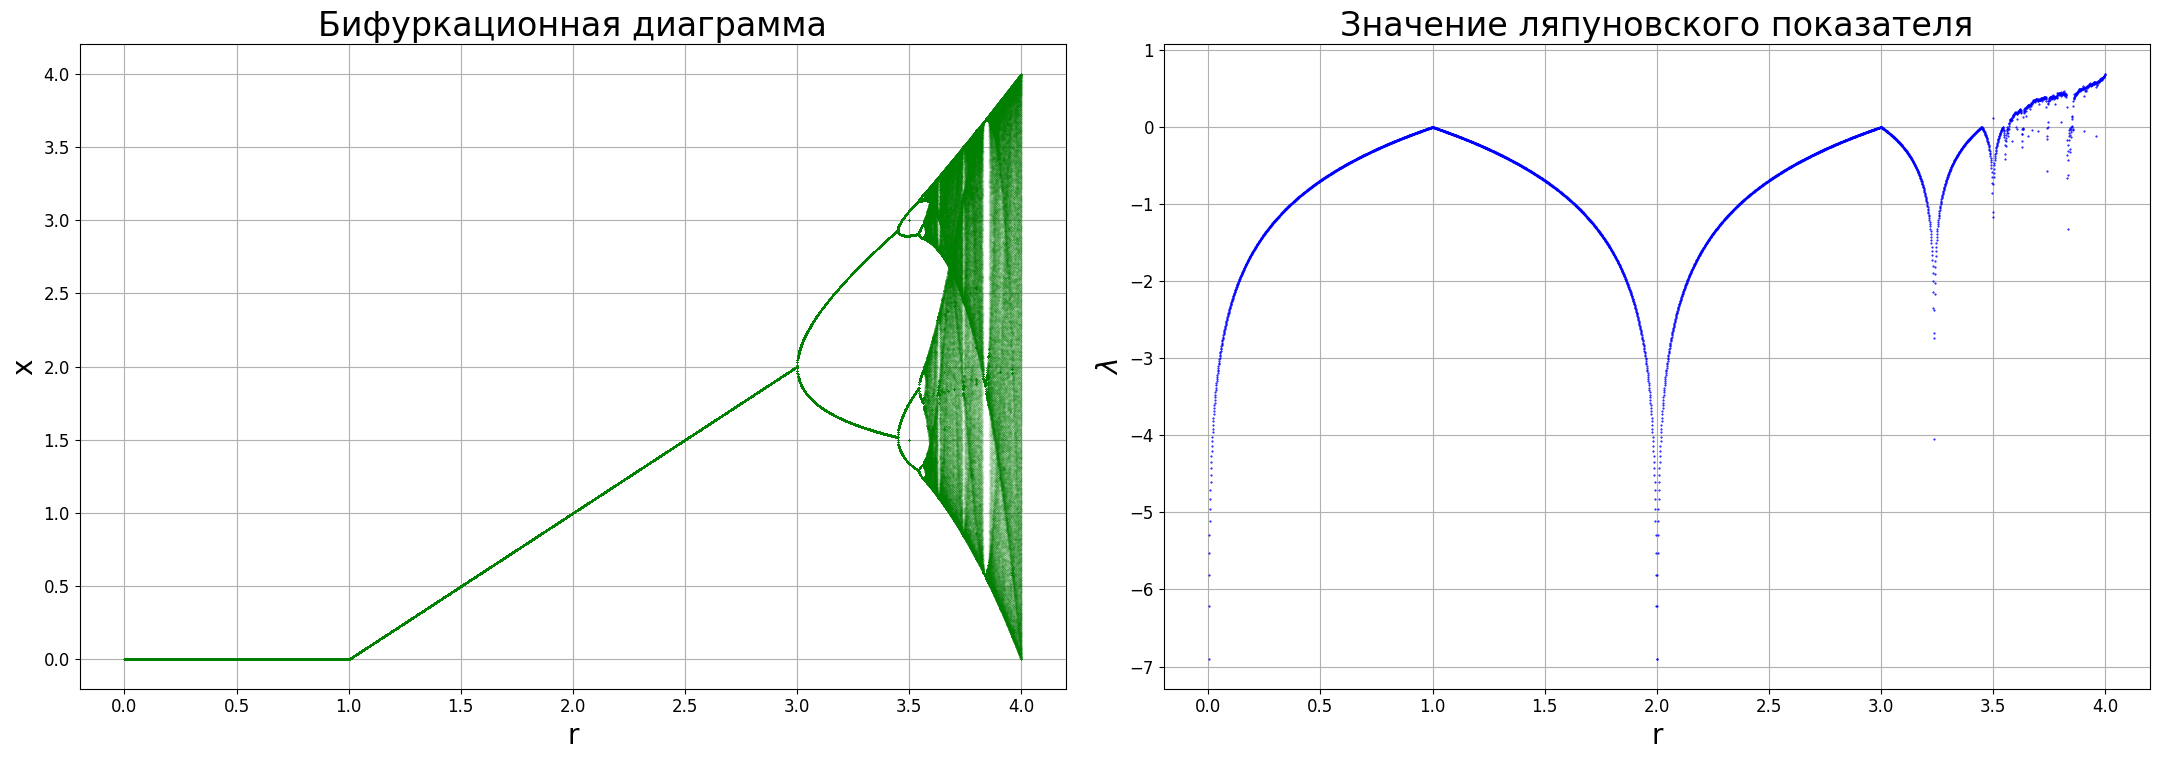

In [2]:
import numpy
import matplotlib.pyplot as plt
#from numba import njit
from math import log
from math import inf

x_0 = 0.5
start = 10000
num_y = 1000
start_r = 0.
max_r = 4.
delta_r = 0.001
num_r = int((max_r - start_r) / delta_r) + 1
xs = numpy.zeros(shape=(num_y), dtype=numpy.float64)

#@njit(cache=True)
def calculate(x, start, r):
    for i in range(start):
        x = x*(r-x)
    return x

#@njit(cache=True)
def calculate_res(xs, num_y, r):
    for i in range(1, num_y):
        xs[i] = xs[i-1]*(r-xs[i-1])

def drawGr(xs, x_0, start, num_y, num_r, delta_r, start_r, gr1):
    for step in range(0, num_r):
        r = step * delta_r + start_r
        x_start = calculate(x_0, start, r)
        rs = numpy.full(num_y, r)
        xs[0] = x_start
        calculate_res(xs, num_y, r)
        gr1.plot(rs, xs, 'g.', markersize=0.05)
        gr2.plot(r, getLyapunov(xs, r, num_y), 'bo', markersize=0.5)

#@njit(cache=True)
def getLyapunov(xs, r, num_y):
    tmp = 0.0
    for x in xs:
        val = abs(r-2*x)
        if val > 0.0:
            tmp += log(abs(r-2*x))
        else:
            tmp = -inf
            break
    return tmp/num_y

print(calculate(x_0, 2000, 4.))        
# при r > 4 значение x стремится к минус бесконечности
print(calculate(x_0, 2000, 4.001))
print(calculate(x_0, 2000, 4.01))

# output task
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(22, 8)
gr1, gr2 = ax[0], ax[1]

drawGr(xs, x_0, start, num_y, num_r, delta_r, start_r, gr1)

plt.rcParams.update({'font.size': 20})

gr1.set_title('Бифуркационная диаграмма')
gr1.set_xlabel('r', fontsize=20)
gr1.set_ylabel('x', fontsize=20)
gr1.grid()

gr2.set_title('Значение ляпуновского показателя')
gr2.set_xlabel('r', fontsize=20)
gr2.set_ylabel('$\\lambda$', fontsize=20)
gr2.grid()


fig.tight_layout()
plt.show()